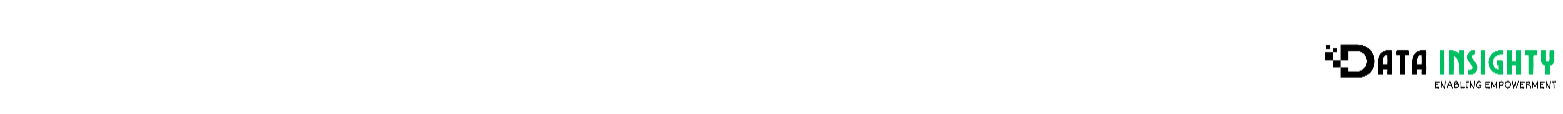

# Decision Tree Regression

Decision Tree Regression is a supervised machine learning algorithm used for regression tasks, which means predicting continuous numerical values based on input features. The algorithm works by splitting the data into subsets based on feature values, creating a tree-like structure to make predictions.

Key Concepts of Decision Tree Regression:
Tree Structure: The decision tree consists of nodes that represent decision points based on input features, and branches that represent possible values of those features. The tree has:

Root node: The first decision point.
Internal nodes: Nodes that represent further decisions or splits based on feature values.
Leaf nodes: The final nodes where predictions (numerical values) are made.
Recursive Splitting: The algorithm recursively splits the data at each node into smaller groups based on the feature that minimizes the prediction error (e.g., mean squared error). The goal is to split the data such that the variance of the target variable in the subsets is minimized.

Regression Objective: At each leaf node, the prediction is usually the mean of the target values for the data points that reach that node.

Splitting Criteria: The algorithm uses a variety of metrics to decide how to split the data at each node. For regression, common criteria include:

Mean Squared Error (MSE): The algorithm tries to minimize the sum of squared differences between predicted and actual values.

https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html

#  Decision Tree Regression with Position-Salaries dataset

In this Regression example we will consider sales based on "Position salries dataset".

In this notebook, we are going to build a Support Vector regression model to predict 'Salary' using ' Level of Position' as the independent variable.

This tutorial covers the following steps:

1. Importing libraries and loading data
2. Understanding the structure of the data
3. Training Simple Linear Regression for entire data
4. Training Polinomial Regression for entire data
4. Predicion using simple Linear Regression and Polinomial Regression

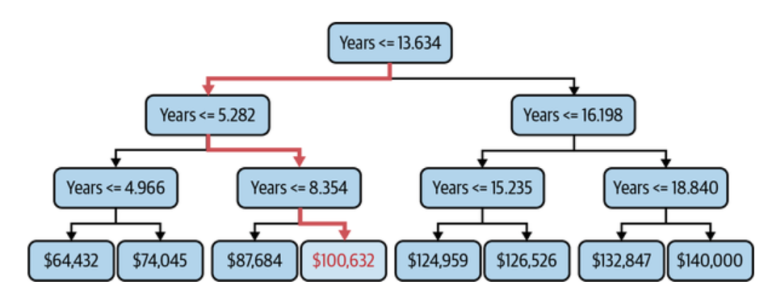

# 1. Importing Libraries and Loading data

Pandas is a powerful data manipulation and analysis library, providing data structures and functions to work with structured data.

NumPy is a fundamental package for scientific computing in Python. It provides support for multidimensional arrays and various mathematical functions to operate on these arrays.

Seaborn is a statistical data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. pyplot is a module within Matplotlib that provides a MATLAB-like interface for plotting.

In [1]:
# Importing necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical computing
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

Data set:https://www.kaggle.com/datasets/akram24/position-salaries/code downloded and saved in Local machine

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# 2. Understanding the Data

In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
# Identify variable types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Level', 'Salary'], dtype='object')
Categorical columns: Index(['Position'], dtype='object')



Frequency distribution for Position
Position
Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: count, dtype: int64

Distribution for Level


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


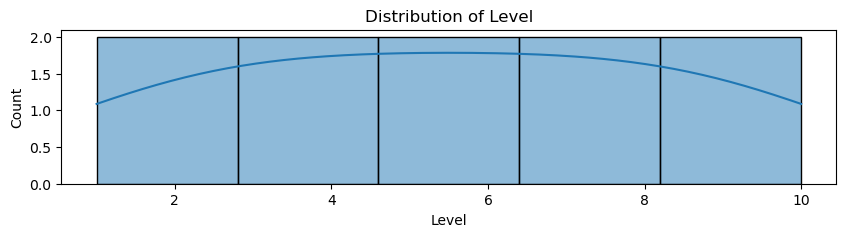

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Distribution for Salary


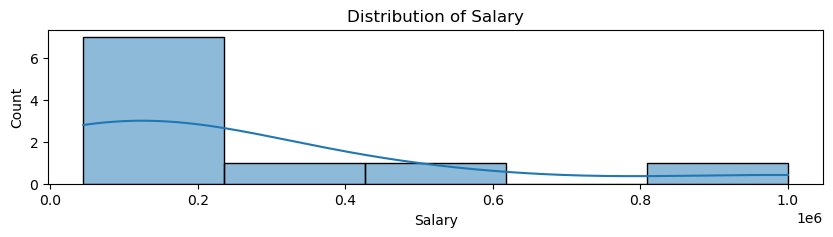

In [5]:
# Create frequency distributions
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df[col].value_counts())

for col in numerical_cols:
    print("\nDistribution for", col)
    plt.figure(figsize=(10, 2))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of " + col)
    plt.show()

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# 3. Perfroming Decision Tree Regression

## Training the DTR model on the whole dataset

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with random_state for reproducibility
regressor = DecisionTreeRegressor(random_state=0)

# Fit the regressor to the training data
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [9]:
# Extract feature importances from the trained model
feature_importances = regressor.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: Importance = {importance}")


Feature 1: Importance = 1.0


## Visualising the Support Vector Regression (SVR) results

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25404\907603592.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


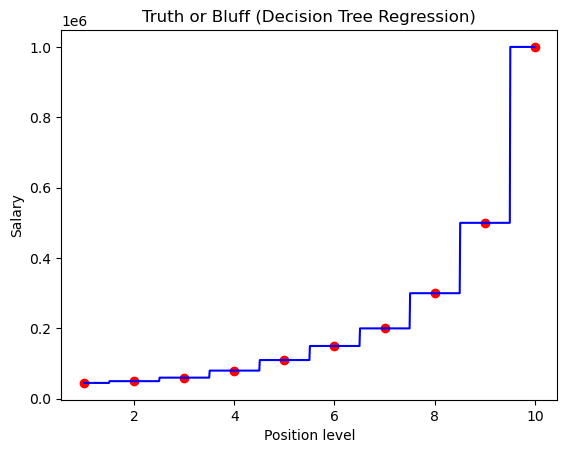

In [10]:
# Generate a range of values for the X-axis
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)

# Plot the original data points
plt.scatter(X, y, color='red')

# Plot the decision tree regression model predictions
plt.plot(X_grid, regressor.predict(X_grid), color='blue')

# Add title and labels
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

# Show plot
plt.show()


# Predicting a new result

In [11]:
regressor.predict([[6.5]])

array([150000.])

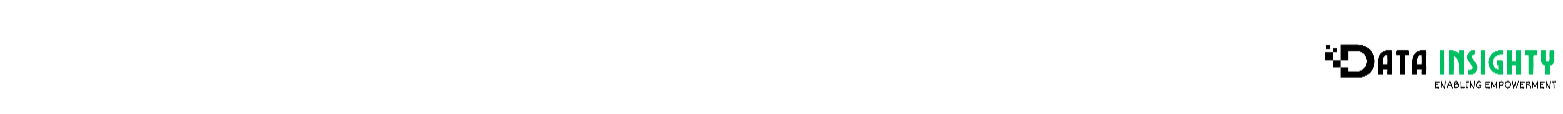